In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
busstop_weight = pd.read_csv("../data/bustop_pop.csv")
all_pop = pd.read_csv("../data/total_data.csv")
all_pop["총인구수"] = all_pop["총인구수"].apply(lambda x: int(x.replace(",", "")))
all_pop["노인(수)"] = all_pop["노인(수)"].apply(lambda x: int(x.replace(",", "")))

city_code = pd.DataFrame([
    {"citycode":38010,"city_name":"창원시"},
    {"citycode":38030,"city_name":"진주시"},
    {"citycode":38050,"city_name":"통영시"},
    {"citycode":38060,"city_name":"사천시"},
    {"citycode":38070,"city_name":"김해시"},
    {"citycode":38080,"city_name":"밀양시"},
    {"citycode":38090,"city_name":"거제시"},
    {"citycode":38100,"city_name":"양산시"},
    {"citycode":38310,"city_name":"의령군"},
    {"citycode":38320,"city_name":"함안군"},
    {"citycode":38330,"city_name":"창녕군"},
    {"citycode":38340,"city_name":"고성군"},
    {"citycode":38350,"city_name":"남해군"},
    {"citycode":38360,"city_name":"하동군"},
    {"citycode":38370,"city_name":"산청군"},
    {"citycode":38380,"city_name":"함양군"},
    {"citycode":38390,"city_name":"거창군"},
    {"citycode":38400,"city_name":"합천군"}
    ])

all_pop = pd.merge(all_pop, city_code, on="city_name", how="left")
all_pop = all_pop[["city_name", "citycode", "총인구수", "노인(수)"]].drop_duplicates()
all_pop = all_pop.rename(columns={"citycode" : "도시코드"})
busstop_weight = pd.merge(busstop_weight, all_pop[[ "도시코드", "총인구수", "노인(수)"]], on="도시코드", how="left")

In [3]:
busstop_weight = busstop_weight.rename(columns={
    "weight" : "이용량",
    "읍면동인구수" : "행정동_노인_생활인구수", 
    "노인(수)" : "노인_인구수"
    })

In [4]:
busstop_weight.columns

Index(['정류장번호', '정류장명', '위도', '경도', '정보수집일', '모바일단축번호', '도시코드', '도시명', '관리도시명',
       'geometry', '이용량', '행정동_노인_생활인구수', '총인구수', '노인_인구수'],
      dtype='object')

In [5]:
use_col = ['정류장번호', '정류장명', '위도', '경도', '도시코드', '도시명', 'geometry', '이용량', '행정동_노인_생활인구수', '총인구수', '노인_인구수']

In [6]:
busstop_weight = busstop_weight[use_col]

In [7]:
busstop_weight

,정류장번호,정류장명,위도,경도,도시코드,도시명,geometry,이용량,행정동_노인_생활인구수,총인구수,노인_인구수
0,CWB379000566,구암고등학교,35.246296,128.593978,38010,경상남도 창원시,POINT (1099529.3099473445 1695090.3215359906),478654.0,410959,1003731,276574
1,CWB379000567,사격장입구,35.244923,128.683156,38010,경상남도 창원시,POINT (1107644.8457543373 1695031.1020157929),464401.0,1934447,1003731,276574
2,CWB379000568,장애인복지회관입구,35.244960,128.673597,38010,경상남도 창원시,POINT (1106775.0680812967 1695024.859684883),732161.0,1934447,1003731,276574
3,CWB379000570,장애인복지회관입구,35.244773,128.673243,38010,경상남도 창원시,POINT (1106743.105090053 1695003.6802969584),266638.0,1934447,1003731,276574
4,CWB379000573,지귀상가,35.244778,128.659437,38010,경상남도 창원시,POINT (1105486.9448440736 1694989.4555102403),1120637.0,1934447,1003731,276574
...,...,...,...,...,...,...,...,...,...,...,...
19023,YSB5166,사과나무집,35.491970,128.989600,38100,경상남도 양산시,POINT (1135114.8887175242 1722807.740568875),3171.0,2291970,356268,90708
19024,YSB5167,이지더원3차,35.322630,129.027700,38100,경상남도 양산시,POINT (1138861.2639738221 1704077.9474447218),147088.0,2291970,356268,90708
19025,YSB5168,반도유보라6차,35.317890,129.027500,38100,경상남도 양산시,POINT (1138851.1887177934 1703551.928831223),147088.0,2291970,356268,90708
19026,YSB5169,양우내안애6차,35.318010,129.023400,38100,경상남도 양산시,POINT (1138478.2608111338 1703559.5004212412),147088.0,2291970,356268,90708


In [8]:
# 노인 인구 대비 이용량 비율
busstop_weight['노인_이용량_비율'] = busstop_weight['행정동_노인_생활인구수'] / busstop_weight['총인구수']

# 노인 인구 밀집도
busstop_weight['노인_밀집도'] = busstop_weight['노인_인구수'] / busstop_weight['총인구수']

# 활용성 지표 계산 (노인 이용량 비율과 노인 밀집도를 종합)
busstop_weight['활용성'] = busstop_weight['노인_이용량_비율'] * busstop_weight['이용량']

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic"
import seaborn as sns

<Axes: >

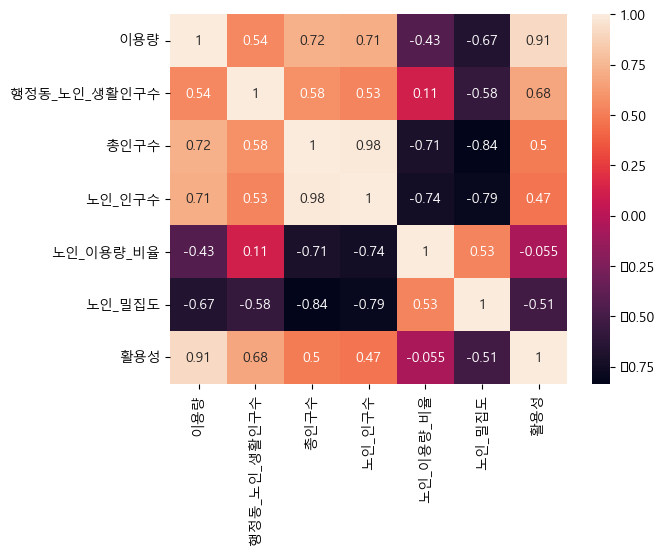

In [10]:
sns.heatmap(
    busstop_weight[["이용량", "행정동_노인_생활인구수",	"총인구수",	"노인_인구수", "노인_이용량_비율", "노인_밀집도", "활용성"]].corr(method="spearman"), 
    annot=True
)

In [11]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [12]:
spearmanr_result = stats.spearmanr(busstop_weight["이용량"], busstop_weight["활용성"])
print("## 이용량과 활용성 변수 간의 상관성 검정")
print(f"     상관관계: {spearmanr_result[0]}")
print(f"     p-value: {spearmanr_result[1]}")
print("     p-value가 0.05보다 작으므로 통계적으로 유의하다. 따라서 두 변수는 상관성이 있다고 판단한다.")

## 이용량과 활용성 변수 간의 상관성 검정
     상관관계: 0.9121557319738152
     p-value: 0.0
     p-value가 0.05보다 작으므로 통계적으로 유의하다. 따라서 두 변수는 상관성이 있다고 판단한다.


In [13]:
regression = smf.ols("이용량 ~ 활용성",data=busstop_weight).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    이용량   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                 3.295e+04
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:50:51   Log-Likelihood:            -2.5440e+05
No. Observations:               19028   AIC:                         5.088e+05
Df Residuals:                   19026   BIC:                         5.088e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.083e+04   1178.920     26.152      0.000    2.85e+04    3.31e+04
활용성            0.2354      0.001    181.527      0.000       0.233       0.238
==============================================================================
Omnibus:                    15621.744   Durbin-Watson:                   0.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1549184.528
Skew:                           3.364   Prob(JB):                         0.00
Kurtosis:                      46.689   Cond. No.                     9.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

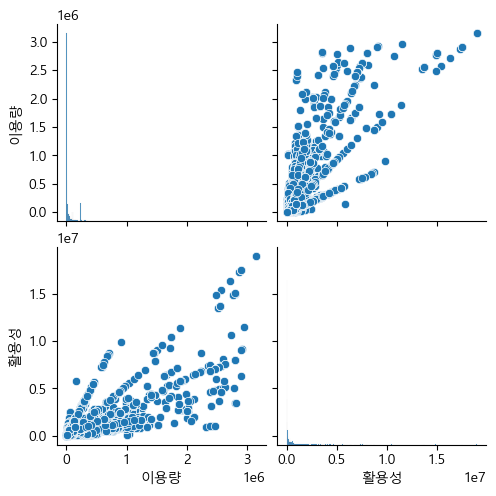

In [14]:
sns.pairplot(
    busstop_weight[["이용량", "활용성"]], 
)

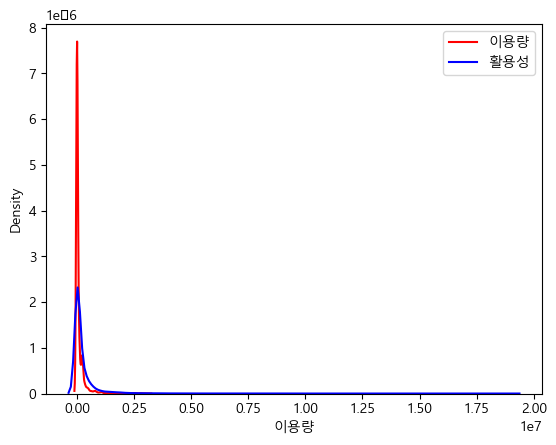

In [15]:
sns.kdeplot(busstop_weight["이용량"], color="r", label="이용량")
sns.kdeplot(busstop_weight["활용성"], color="b", label="활용성")
plt.legend()
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
busstop_weight["활용성"] = scaler.fit_transform(busstop_weight[["활용성"]])

In [17]:
busstop_weight

,정류장번호,정류장명,위도,경도,도시코드,도시명,geometry,이용량,행정동_노인_생활인구수,총인구수,노인_인구수,노인_이용량_비율,노인_밀집도,활용성
0,CWB379000566,구암고등학교,35.246296,128.593978,38010,경상남도 창원시,POINT (1099529.3099473445 1695090.3215359906),478654.0,410959,1003731,276574,0.409431,0.275546,0.010307
1,CWB379000567,사격장입구,35.244923,128.683156,38010,경상남도 창원시,POINT (1107644.8457543373 1695031.1020157929),464401.0,1934447,1003731,276574,1.927256,0.275546,0.047073
2,CWB379000568,장애인복지회관입구,35.244960,128.673597,38010,경상남도 창원시,POINT (1106775.0680812967 1695024.859684883),732161.0,1934447,1003731,276574,1.927256,0.275546,0.074214
3,CWB379000570,장애인복지회관입구,35.244773,128.673243,38010,경상남도 창원시,POINT (1106743.105090053 1695003.6802969584),266638.0,1934447,1003731,276574,1.927256,0.275546,0.027027
4,CWB379000573,지귀상가,35.244778,128.659437,38010,경상남도 창원시,POINT (1105486.9448440736 1694989.4555102403),1120637.0,1934447,1003731,276574,1.927256,0.275546,0.113591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19023,YSB5166,사과나무집,35.491970,128.989600,38100,경상남도 양산시,POINT (1135114.8887175242 1722807.740568875),3171.0,2291970,356268,90708,6.433275,0.254606,0.001073
19024,YSB5167,이지더원3차,35.322630,129.027700,38100,경상남도 양산시,POINT (1138861.2639738221 1704077.9474447218),147088.0,2291970,356268,90708,6.433275,0.254606,0.049768
19025,YSB5168,반도유보라6차,35.317890,129.027500,38100,경상남도 양산시,POINT (1138851.1887177934 1703551.928831223),147088.0,2291970,356268,90708,6.433275,0.254606,0.049768
19026,YSB5169,양우내안애6차,35.318010,129.023400,38100,경상남도 양산시,POINT (1138478.2608111338 1703559.5004212412),147088.0,2291970,356268,90708,6.433275,0.254606,0.049768


In [18]:
# busstop_weight.to_csv("../data/busstop_act.csv", index=False)